<a href="https://colab.research.google.com/github/Nithie-code/Multiple_Linear_Regression/blob/main/Automatidata_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this project is to build a multiple linear regression model and evaluate the model.

In [ ]:
#Necessary imports
#a.Packages for numerics and dataframes
import pandas as pd
import numpy as np
#b.visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
#c.packages from date conversions
from datetime import datetime
from datetime import date
from datetime import timedelta
#d.Packages fro OLS, MLR and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
#imports
import io

In [ ]:
# upload the dataset
from google.colab import files
uploaded=files.upload()

Saving 2017_Yellow_Taxi_Trip_Data.csv to 2017_Yellow_Taxi_Trip_Data.csv


In [ ]:
original_data=pd.read_csv(io.BytesIO(uploaded['2017_Yellow_Taxi_Trip_Data.csv']))



Task 1a: Explore data with EDA

In [ ]:
# Dispaly basic info of the data
print('Basic info of the data')
print('----------------------')
print(original_data.info())
print("shape of the data:" ,original_data.shape)

Basic info of the data
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amou

In [ ]:
# Missing values and duplicates checking
print('Shape of original data: ',original_data.shape)
print('Shape of data with duplicate dropped: ',original_data.drop_duplicates().shape)
#Missing values  in dataframe
print("Total count of missing values: ",original_data.isna().sum().sum())
print('Total number of missing Values per column:',original_data.isna().sum())

Shape of original data:  (22699, 18)
Shape of data with duplicate dropped:  (22699, 18)
Total count of missing values:  0
Total number of missing Values per column: Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [ ]:
#Display descriptive stats about the data
original_data.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Task 1b. Convert data type for  pickup & dropoff columns to datetime

In [ ]:
#Check the datatype
original_data['tpep_dropoff_datetime']

0         03/25/2017 9:09:47 AM
1         04/11/2017 3:19:58 PM
2         12/15/2017 7:34:08 AM
3         05/07/2017 1:48:14 PM
4        04/15/2017 11:49:03 PM
                  ...          
22694     02/24/2017 5:40:39 PM
22695     08/06/2017 5:24:47 PM
22696     09/04/2017 2:58:22 PM
22697     07/15/2017 1:08:26 PM
22698     03/02/2017 1:16:09 PM
Name: tpep_dropoff_datetime, Length: 22699, dtype: object

In [ ]:
#  visualize the original data type
print("Data type of tpep_pickup_datetime column: ",original_data['tpep_pickup_datetime'].dtype)
print("Data type of tpep_dropoff_datetime column: ",original_data['tpep_dropoff_datetime'].dtype)
# convert the data type to datetime for those two columns
original_data['tpep_pickup_datetime']=pd.to_datetime(original_data['tpep_pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')
original_data['tpep_dropoff_datetime']=pd.to_datetime(original_data['tpep_dropoff_datetime'],format='%m/%d/%Y %I:%M:%S %p')
#Display some observations
original_data.head(10)


Data type of tpep_pickup_datetime column:  object
Data type of tpep_dropoff_datetime column:  object


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Task 1c: To create a new column named duration that indicates the length of times (minutes) that  each taxi ride took

In [ ]:
original_data['duration']=(original_data['tpep_dropoff_datetime']-original_data['tpep_pickup_datetime'])/np.timedelta64(1,'m')
original_data.head(10)
# Check again more information about our data, but we are mostly interested on trip_distance,fare_amount,duration thus we have to do more exploration about these three columns
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Task 1d :Plot to visualize the data of trip_distance,fare_amount,duration Columns

<Axes: xlabel='duration'>

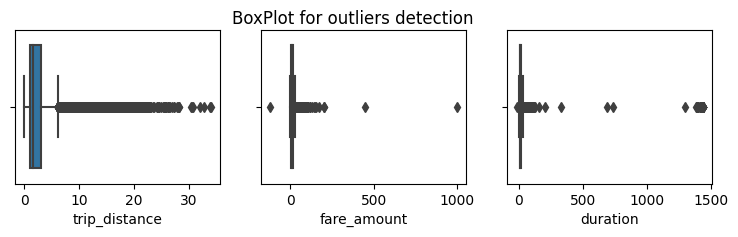

In [ ]:
#plot box plots
fig, axes=plt.subplots(1,3,figsize=(9,2))
fig.suptitle('BoxPlot for outliers detection')
sns.boxplot(ax=axes[0],x=original_data['trip_distance'])
sns.boxplot(ax=axes[1],x=original_data['fare_amount'])
sns.boxplot(ax=axes[2],x=original_data['duration'])


We can observe that there are outliers for both three variables.It seems there are 30 miles from the southern tip of Staten Island to the northern end of Manhattan thus a straight line. The fare_amount and duration  variables seem to have  outliers at the high end .

In [ ]:
#1. Investigate trip_distance Variable

print(sorted(set(original_data['trip_distance']))[:15])
# We observe distance equals in data  we need to investigate to calculate the count of rides where the trip_distance is 0
print('Number of trip_distance equals to 0: ',sum(original_data['trip_distance']==0))
# It seems to have no problem since the number isn't big

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14]
Number of trip_distance equals to 0:  148


In [ ]:
#2. Investigate the fare_amount variable to  fix the outliers
print(original_data['fare_amount'].describe())

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64


Low values is negative which is problematic and high values is $999.9 which is unlikely happened.

In [ ]:
# impute values less than $0 with 0
original_data.loc[original_data['fare_amount']<0,'fare_amount']=0
#Display the minimum
print("Min value for fare_amount column: ",original_data['fare_amount'].min())
#original_data.describe()

Min value for fare_amount column:  0.0


Impute the maximum value for fare_amount column as Q3 + (6 * IQR).

In [ ]:
def outlier_imputer(column_list,iqr_factor):
    for col in column_list:
        #Reassign min to 0
        original_data.loc[original_data[col]<0,col]=0
        #Determine upper threshold
        q1=original_data[col].quantile(0.25)
        q3=original_data[col].quantile(0.75)
        iqr=q3-q1
        upper_threshold=q3+(iqr_factor*iqr)
        print(col)
        print('q3:',q3)
        print('Upper_threshold: ',upper_threshold)
        #Reassign Values > Threshold to Threshold
        original_data.loc[original_data[col]> upper_threshold,col]=upper_threshold
        print(original_data[col].describe())

outlier_imputer(['fare_amount'],6)

fare_amount
q3: 14.5
Upper_threshold:  62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


In [ ]:
#3.Investigate and fix outliers duration varibale
original_data['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The duration variable has the following issues:(1) negative values: No negative values can be used to represent times(Min:-16.9)
(2)High Values(Max: 1439.55)
To solve these problems, we employ same way  we did fare_amount values

In [ ]:
#Replace any negative values for duration by zero
original_data.loc[original_data['duration']<0,'duration']=0
print('Min value for duration variable: ',original_data['duration'].min())

Min value for duration variable:  0.0


In [ ]:
# Impute the high values
outlier_imputer(['duration'],6)

duration
q3: 18.383333333333333
Upper_threshold:  88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


**Task 2: Feature Engineering**

In [ ]:
#1 Create mean_distance column  to capture the mean distance for each group of trips that share pickup and dropoff points
#create the pickup_dropoff column //combine PULocationID and DOLocationID  as str datatype
original_data['pickup_dropoff']=original_data['PULocationID'].astype(str)+'  ' +original_data['DOLocationID'].astype(str)

original_data['pickup_dropoff'].head(10)



0    100  231
1     186  43
2    262  236
3     188  97
4      4  112
5    161  236
6     79  241
7    237  114
8    234  249
9    239  237
Name: pickup_dropoff, dtype: object

In [ ]:
# Group the data using pickup_dropoff column
grouped_data=original_data.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped_data[:10]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
100 113,2.024000
100 114,1.940000
100 12,4.550000
100 125,2.840000


In [ ]:
#Convert the grouped to  a dictionary
grouped_dict=grouped_data.to_dict()
#print(grouped_dict)
#Reassign to only contain inner dictionary
grouped_dict=grouped_dict['trip_distance']

#print(grouped_dict)

In [ ]:
# create a mean distance column Viz.a copy of pickup_dropoff helpercolumn
original_data['mean_distance']= original_data['pickup_dropoff']
#Map grouped_dict to the mean_distance column
original_data['mean_distance']=original_data['mean_distance'].map(grouped_dict)
original_data[(original_data['PULocationID']==100) & (original_data['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [ ]:
#2. Create  mean_duration Column
grouped_data= original_data.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
print(grouped_data[:10])
grouped_dict=grouped_data.to_dict()
grouped_dict=grouped_dict['duration']
original_data['mean_duration']=original_data['pickup_dropoff']
original_data['mean_duration']=original_data['mean_duration'].map(grouped_dict)
original_data[(original_data['PULocationID']==100) & (original_data['DOLocationID']==231)][['mean_duration']]




                 duration
pickup_dropoff           
1  1             0.466667
10  148         69.366667
100  1          48.183333
100  100         3.130556
100  107        11.200000
100  113        14.453333
100  114        15.325000
100  12         17.975000
100  125        17.608333
100  13         31.902778


,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [ ]:
#3.Create Day and Month Columns
#Create day column
original_data['day']=original_data['tpep_pickup_datetime'].dt.day_name().str.lower()
#create 'month' column
original_data['month']=original_data['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
original_data.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,2.06,0.0,0.3,12.36,8.000000,161 236,2.052258,11.855376,saturday,mar
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,9.86,0.0,0.3,59.16,59.633333,79 241,12.830000,59.633333,wednesday,may
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,1.78,0.0,0.3,19.58,21.983333,237 114,4.022500,26.437500,tuesday,aug
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.00,0.0,0.3,9.80,12.116667,234 249,1.019259,7.873457,saturday,feb
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,2.75,0.0,0.3,16.55,20.433333,239 237,1.580000,10.541111,friday,nov


In [ ]:
#4 create rush_hour Column . Rush_hour is defined as any weekday not saturday or sunday AND either from 6:00-10:00 or from 16:00-20:00
original_data['rush_hour']=original_data['tpep_pickup_datetime'].dt.hour
#If day is saturday or sunday then rush_hour =0
original_data.loc[original_data['day'].isin(['saturday','sunday']),'rush_hour']  = 0

In [ ]:
def rush_houriser(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val


In [ ]:
#Apply the rush_houruser() f(x) to the rush_hour column
original_data.loc[(original_data.day !='saturday')&(original_data.day !='sunday'),'rush_hour']=original_data.apply(rush_houriser,axis=1)
original_data.head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,8.000000,161 236,2.052258,11.855376,saturday,mar,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,79 241,12.830000,59.633333,wednesday,may,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,21.983333,237 114,4.022500,26.437500,tuesday,aug,1
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80,12.116667,234 249,1.019259,7.873457,saturday,feb,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55,20.433333,239 237,1.580000,10.541111,friday,nov,0


**Task 3: Generate Scatter Plot: Visualize the relationship between mean_duration and fare_amount.**

Text(0.5, 1.0, 'Mean duration x fare amount ')

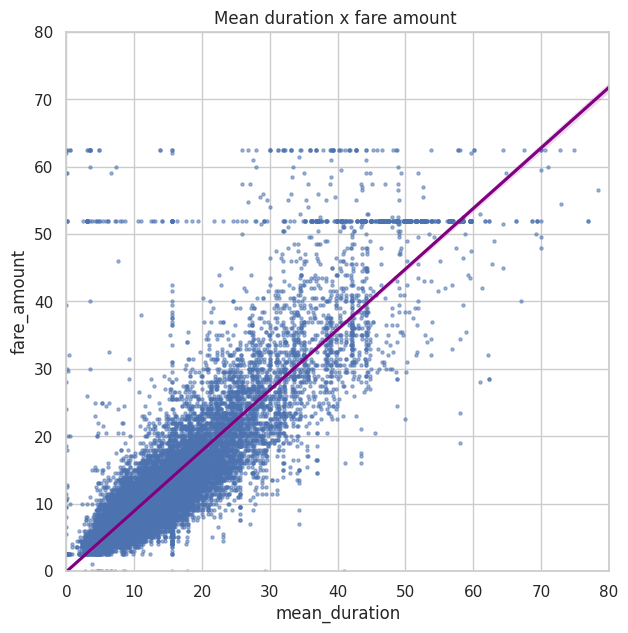

In [ ]:
sns.set(style='whitegrid')
fig=plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
sns.regplot(x=original_data['mean_duration'], y=original_data['fare_amount'],scatter_kws={'alpha':0.5,'s':5},line_kws={'color':'purple'})
plt.ylim(0,80)
plt.xlim(0,80)
plt.title('Mean duration x fare amount ')

Explore and understand the Horizontal line around fare amounts of 52 dollars and 63 dollars

In [ ]:
original_data[original_data['fare_amount'] > 50 ]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

These are 514 trips whose fares were $52 thus we observe the horizontal  line. Let us try  to display them.

In [ ]:
pd.set_option('display.max_columns', None)
original_data[original_data['fare_amount'] == 52].head(100)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,80699817,1,2017-09-25 19:02:14,2017-09-25 19:55:38,1,18.70,2,N,132,48,1,52.0,4.5,0.5,11.45,0.00,0.3,68.75,53.400000,132 48,18.761905,58.246032,monday,sep,1
4121,70092339,2,2017-08-19 09:10:20,2017-08-19 09:48:05,1,18.69,2,N,48,132,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,37.750000,48 132,17.690000,46.705556,saturday,aug,0
4128,18611709,2,2017-03-11 17:08:27,2017-03-11 18:01:42,1,20.69,2,N,132,141,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,53.250000,132 141,19.140000,50.397222,saturday,mar,0
4191,36018976,2,2017-04-28 08:41:44,2017-04-28 09:24:20,4,16.64,2,N,107,132,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56,42.600000,107 132,16.755000,50.754167,friday,apr,1


**Task 3a: Features Selection**

In [ ]:
# In the section, we drop features that are  irrelevant or redundant
# display again more info about the data
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [ ]:
final_data=original_data.copy()
final_data=final_data.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month' ], axis=1)


#display the info  available in final_data
final_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


**Task 4: Generate Pair plot that depicts pairwise relationships between fare_amount, mean_duration, and mean_distance.**

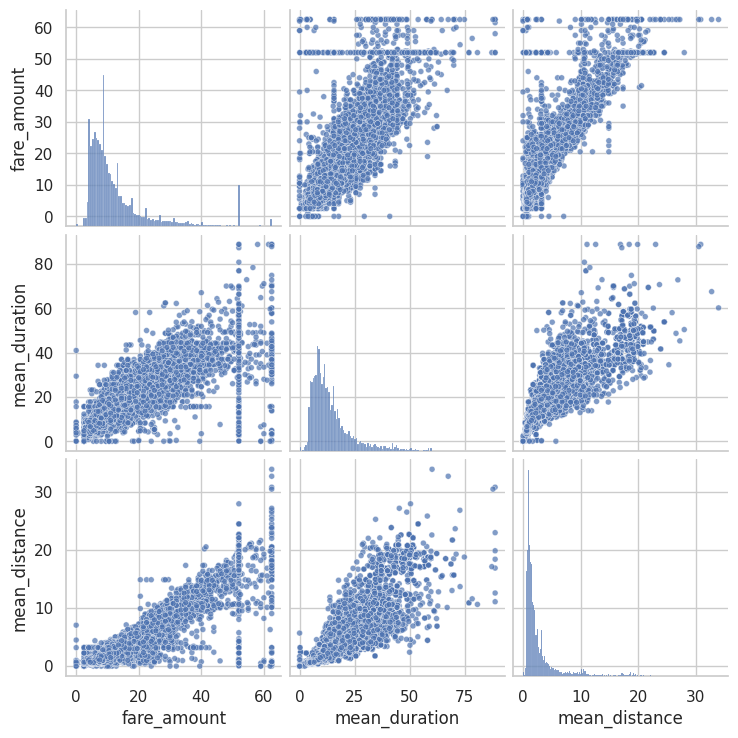

In [ ]:
sns.pairplot(final_data[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.7, 'size':5},
             );


**Task 5: Check for correlations**

In [ ]:
# create a correlation matrix containing pairwise of columns employing pearson coefficient
final_data.corr(method='pearson')


,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


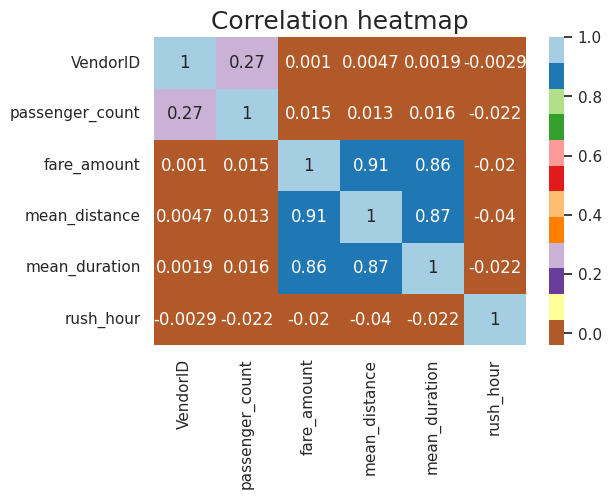

In [ ]:
# create a heatmap to depict the correlation
plt.figure(figsize=(6,4))
sns.heatmap(final_data.corr(method='pearson'),annot=True,cmap='Paired_r')
plt.title('Correlation heatmap',fontsize=18)
plt.show()

On observe that mean_duration and mean_distance are both highly correlated with the target variable of fare_amount. Moreover, they're also correlated with each other(0.87).

** Task 6.Construct the MLR model**

6a. Split data into outcome variable and features

In [ ]:
final_data.info()
final_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


In [ ]:
#Remove the target variable from the features
X=final_data.drop(columns=['fare_amount'])
# set y variable
y=final_data[['fare_amount']]
#Display X features
X.head(10)

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0
5,2,6,2.052258,11.855376,0
6,2,1,12.830000,59.633333,1
7,2,1,4.022500,26.437500,1
8,2,1,1.019259,7.873457,0
9,1,1,1.580000,10.541111,0


6b.Data pre-processing

In [ ]:
#convert vendorID to String
X['VendorID']=X['VendorID'].astype(str)
#Get Dummies
X=pd.get_dummies(X,drop_first=True)
X.head(10)

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1
5,6,2.052258,11.855376,0,1
6,1,12.830000,59.633333,1,1
7,1,4.022500,26.437500,1,1
8,1,1.019259,7.873457,0,1
9,1,1.580000,10.541111,0,0


In [ ]:
#Split the dataset into two sets (training and test sets )
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#Standaridize the data
scaler=StandardScaler().fit(X_train)
X_train_scaler=scaler.transform(X_train)
print(X_train_scaler)

[[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


In [ ]:
#Fit the model to the training data
lr=LinearRegression()
lr.fit(X_train_scaler,y_train)


LinearRegression()

6c.Evaluate model

In [ ]:
# Evaluate the model using train dataset
r_sq=lr.score(X_train_scaler,y_train)
print('Coefficients : ',r_sq)
y_pred_tr=lr.predict(X_train_scaler)
print('R-Squared :',r2_score(y_train,y_pred_tr))
print('MAE: ',mean_absolute_error(y_train,y_pred_tr))
print('MSE: ',mean_squared_error(y_train,y_pred_tr))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_pred_tr)))


Coefficients :  0.8398434585044773
R-Squared : 0.8398434585044773
MAE:  2.186666416775414
MSE:  17.88973296349268
RMSE:  4.229625629236313


In [ ]:
# Evaluate the model employing test data
X_test_scaled=scaler.transform(X_test)
r_sq_test=lr.score(X_test_scaled,y_test)
print('Coefficient of determination: ',r_sq_test)
y_pred_test=lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test,y_pred_test))
print('MAE: ',mean_absolute_error(y_test,y_pred_test))
print('MSE: ',mean_squared_error(y_test,y_pred_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Coefficient of determination:  0.8682583641795454
R^2: 0.8682583641795454
MAE:  2.1336549840593864
MSE:  14.326454156998942
RMSE:  3.7850302716093225


**7a.Task: Results**

In [ ]:
# Create a `results` dataframe

results=pd.DataFrame(data={'actual':y_test['fare_amount'],'predicted':y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


7b.Visualize Model Results

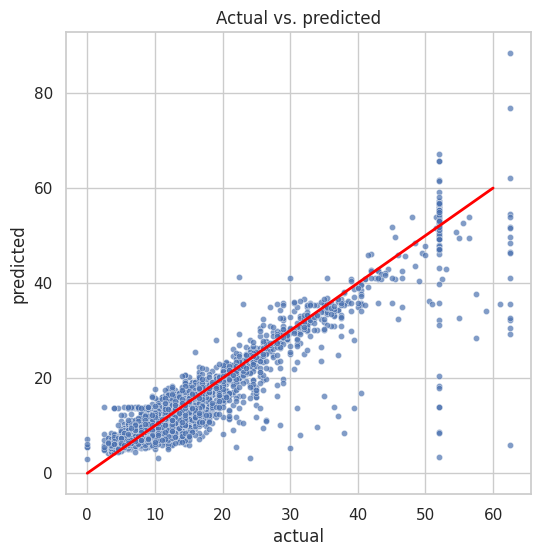

In [ ]:
#1.Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.7,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Text(0, 0.5, 'count')

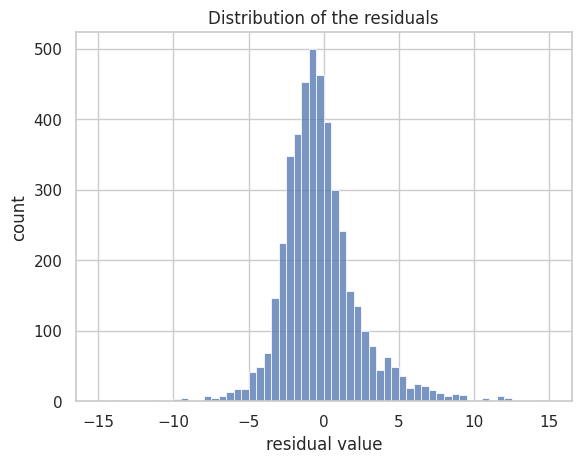

In [ ]:
# 2.Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')

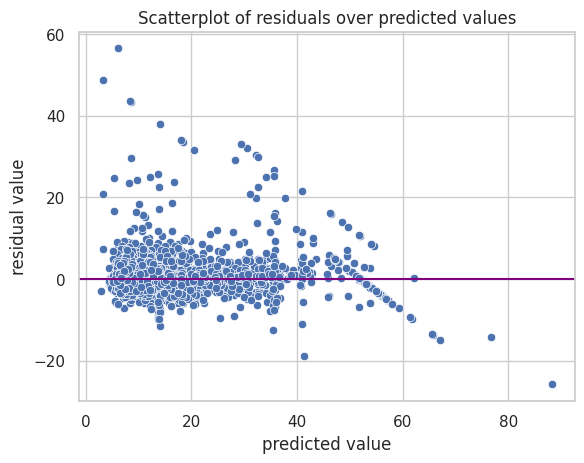

In [ ]:
#3 Generate  a scatterplot of residuals over predicted

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='purple')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [ ]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
print('Coefficients:', coefficients)

Coefficients:    passenger_count  mean_distance  mean_duration  rush_hour  VendorID_2
0         0.030825       7.133867       2.812115   0.110233   -0.054373
